In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=365, freq='D')
prices = np.random.normal(loc=50, scale=10, size=len(dates))

data = pd.DataFrame({
    'Date': dates,
    'Price': prices
})
data.head()



,Date,Price
0,2023-01-01,67.640523
1,2023-01-02,54.001572
2,2023-01-03,59.787380
3,2023-01-04,72.408932
4,2023-01-05,68.675580


C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


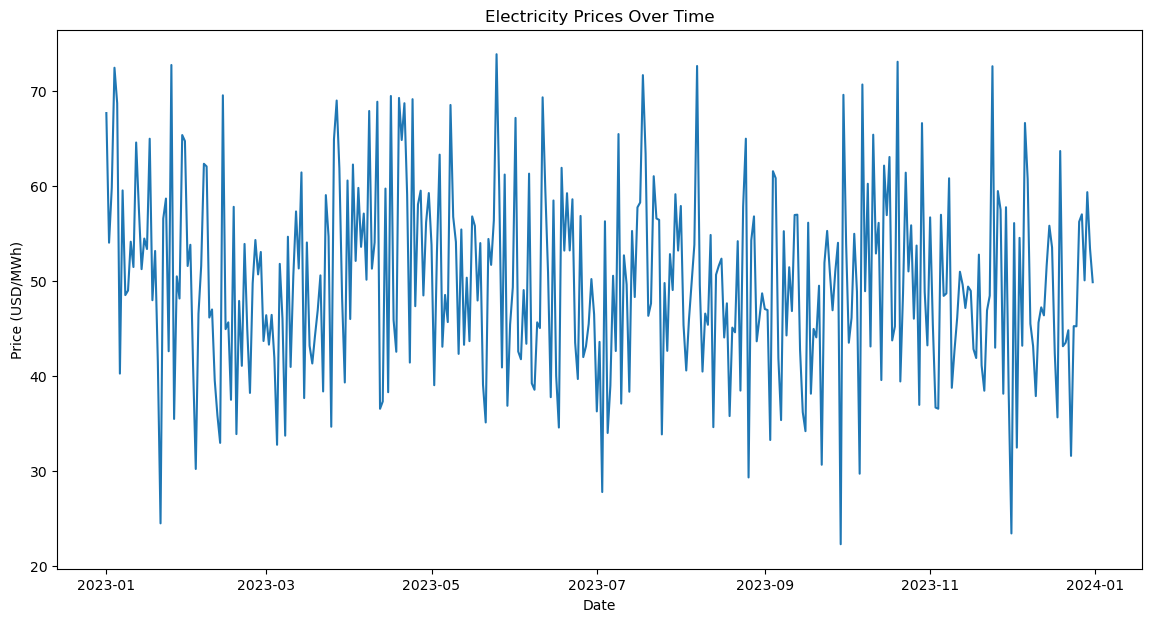

In [12]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Price', data=data)
plt.title('Electricity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD/MWh)')
plt.show()

C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

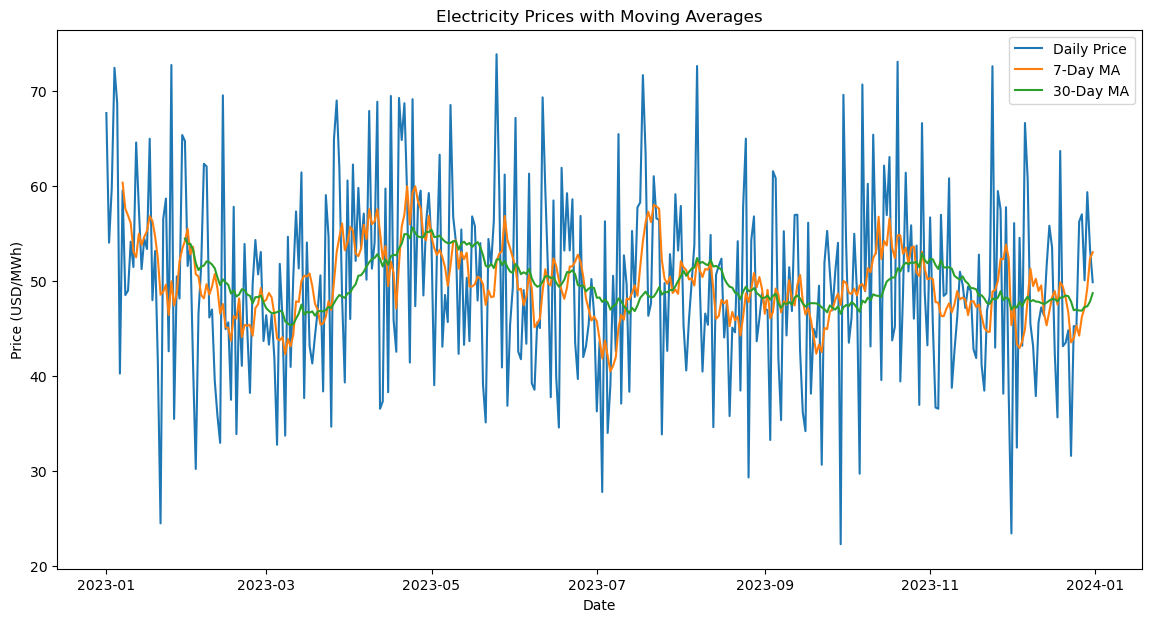

In [14]:
data['7-Day MA'] = data['Price'].rolling(window=7).mean()
data['30-Day MA'] = data['Price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Price', data=data, label='Daily Price')
sns.lineplot(x='Date', y='7-Day MA', data=data, label='7-Day MA')
sns.lineplot(x='Date', y='30-Day MA', data=data, label='30-Day MA')
plt.title('Electricity Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD/MWh)')
plt.legend()
plt.show()

Mean Squared Error: 80.64039293969071


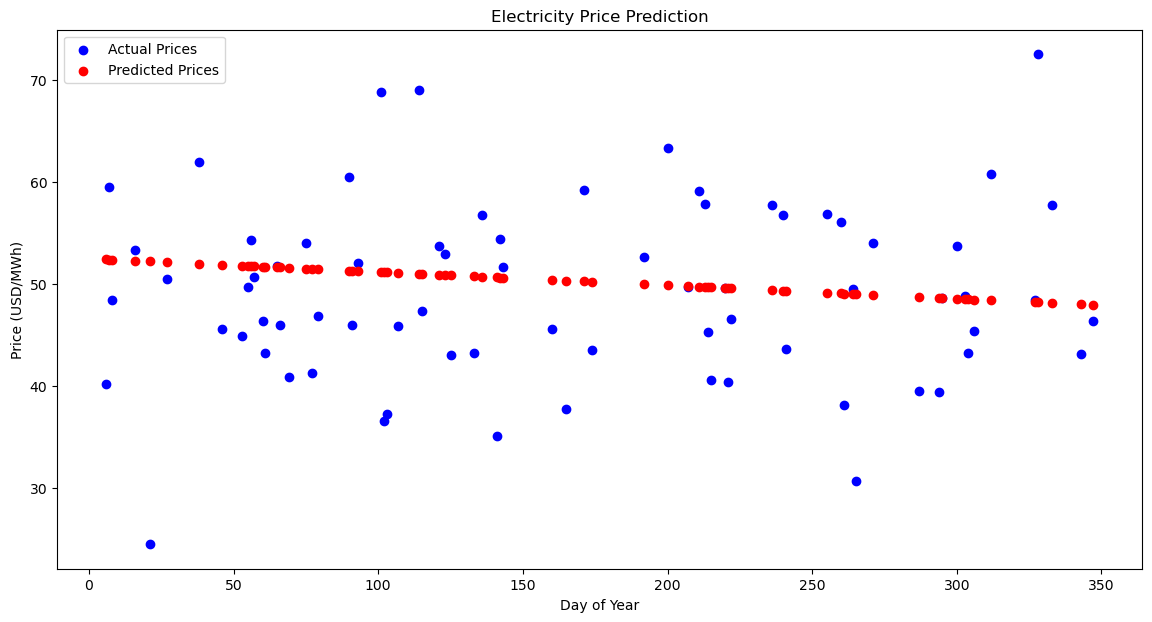

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
data['DayOfYear'] = data['Date'].dt.dayofyear
X = data[['DayOfYear']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.title('Electricity Price Prediction')
plt.xlabel('Day of Year')
plt.ylabel('Price (USD/MWh)')
plt.legend()
plt.show()